-  __ECE 657A: Data and Knowledge Modelling and Analysis__
- __Winter 2019__
- __WATIAM:roozara ID: 20801583__
- __Homework 3:Eigenvector Decomposition__

Reference used :https://hadrienj.github.io/posts/Preprocessing-for-deep-learning/
https://archive.ics.uci.edu/ml/machine-learning-databases/communities/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#for eigen value
from numpy import cov
from numpy import linalg as LA
#pd.options.display.max_columns = None
pd.options.display.max_rows = None

def readFromFile(name):
    with open(name) as f: 
         features= [line.split(' ')[1] for line in f.readlines()
                    if line.startswith('@attr')]
    return features  
                


 
   


# Importing the crime dataset and storing in a matrix
The crime dataset was loaded into a matrix ,its observed that the data is already normalized but so many missing values.
About 1675 out of 1993 missing values each in columns 101 to 126 were replaced by the mean of those features. the first
5 columns including two (county & community of which contained about 1174 missing values each were not included in 
creating the matrix.These first five non predictive attributes were left out of the analysis. 128 scaled to 123 features
being analysed.      

In [2]:
#importing the communities dataset into variable cdata
cdata = pd.read_csv('data/communities.data',sep= ',', header = None, na_values=["?"]) 



#print(Acdata)
#examining the data to correct for missing valiue

#IDENTIFYING COLUMNS WITH null value and filling with the mean
#nan_col=pd.DataFrame(cdata.isnull().sum(axis=0))
#nan_col.index =  list(range(128))

cdata.iloc[:,4:] = cdata.iloc[:,4:].apply(lambda x: x.fillna(x.mean()),axis=0)
cdata.columns = readFromFile('data/communities.names')
print('Crime dataset dimension', cdata.shape)
cdata.head(5)



Crime dataset dimension (1994, 128)


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


In [3]:
#matrix creating with numpy
cdata_matrix = np.matrix(cdata.iloc[:,5:])
print('Matrix created' ,'(dimension' ,cdata_matrix.shape,')','\n',cdata_matrix)


Matrix created (dimension (1994, 123) ) 
 [[0.19       0.33       0.02       ... 0.32       0.14       0.2       ]
 [0.         0.16       0.12       ... 0.         0.19507837 0.67      ]
 [0.         0.42       0.49       ... 0.         0.19507837 0.43      ]
 ...
 [0.16       0.37       0.25       ... 0.91       0.28       0.23      ]
 [0.08       0.51       0.06       ... 0.22       0.18       0.19      ]
 [0.2        0.78       0.14       ... 1.         0.13       0.48      ]]


# Compute the eigenvectors and eigenvalue and Reporting the top 20 eigenvalues
We compute the eigenvectors and thus eigen value by first calculating the covaraince matrix. We project
any data onto the principal subspace that is spanned by the eigenvectors that belong to the largest eigenvalues.

In [4]:

cov_matrix = np.cov(cdata_matrix, rowvar=False, bias=True)
eigenvalues, eigenVector = LA.eig(cov_matrix)
x = np.arange(1, 124,1)
eig_valTable = pd.DataFrame(eigenvalues, index = x, columns = ['Eigenvalues'])
eig_valTable.sort_values(by='Eigenvalues', ascending=False, inplace=True)
eig_valTable.head(20)

,Eigenvalues
1,1.091241
2,0.760521
3,0.333826
4,0.287335
5,0.187330
6,0.161874
7,0.133454
8,0.111856
9,0.088807
10,0.076775


As it can be seen from the first plot (left plot) below, it is hard to have a clear cut off since the
curve is more shallow. The first 20 eigenvalues count for ~85% of the variance. The 95% were
calculated below and it turned out that we need approximately 39 eigenvalues to process 95% of
the data.

Text(0, 0.5, 'sum(Eigenvalues)')

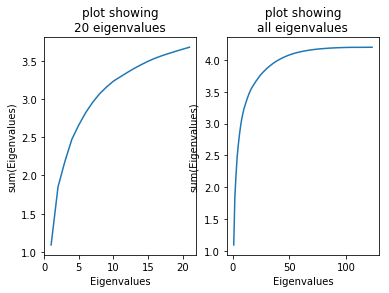

In [5]:
i = 1
j = 0  
y = np.zeros(shape=(123,1))

for index, row in eig_valTable.iterrows():
    y[j] = eig_valTable['Eigenvalues'][i] + y[j-1]
    i += 1
    j += 1    
    
sum_eigen = pd.DataFrame(y, index = x)
sum_eigen['Eigenvalue No'] = x
    
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x[:21], y[:21])
ax1.set_title('plot showing\n20 eigenvalues')
ax1.set_xlabel('Eigenvalues')
ax1.set_ylabel('sum(Eigenvalues)')

ax2.plot(x, y)
ax2.set_title(' plot showing \nall eigenvalues')
ax2.set_xlabel('Eigenvalues')
ax2.set_ylabel('sum(Eigenvalues)')

In [6]:
print(sum_eigen[(sum_eigen[0] > 3.98) & (sum_eigen[0] < 3.992268253580597)])

           0  Eigenvalue No
39  3.986718             39
